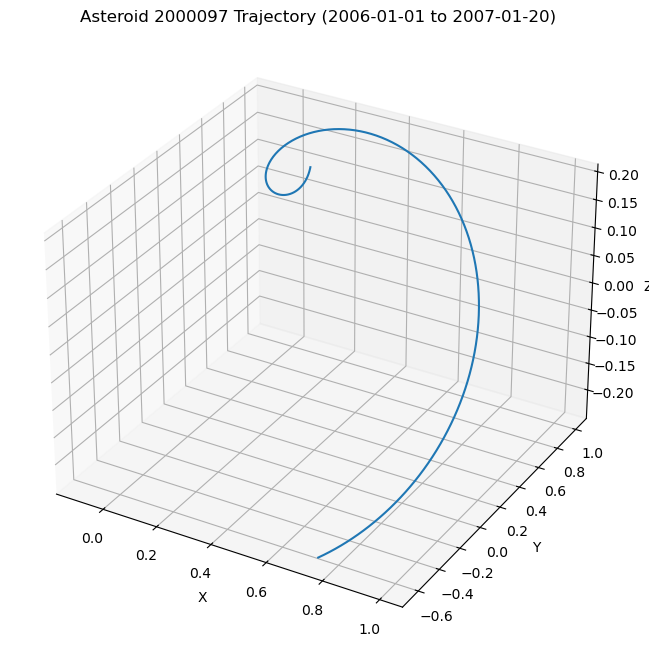

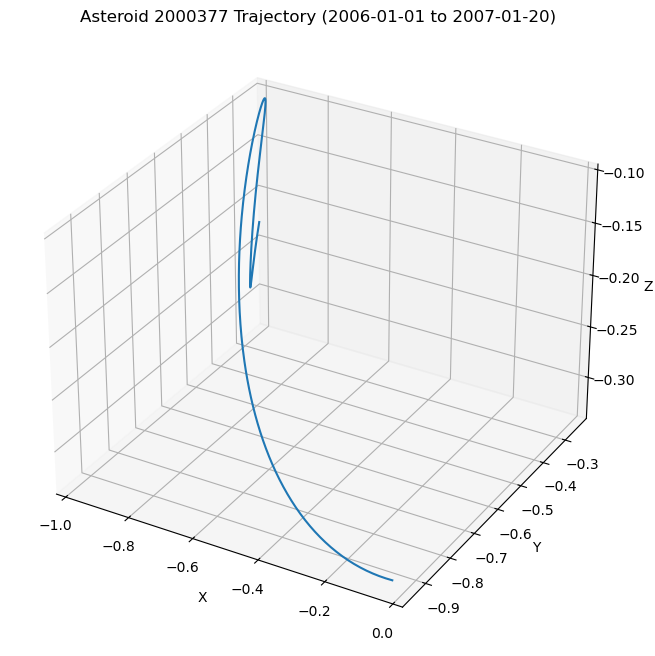

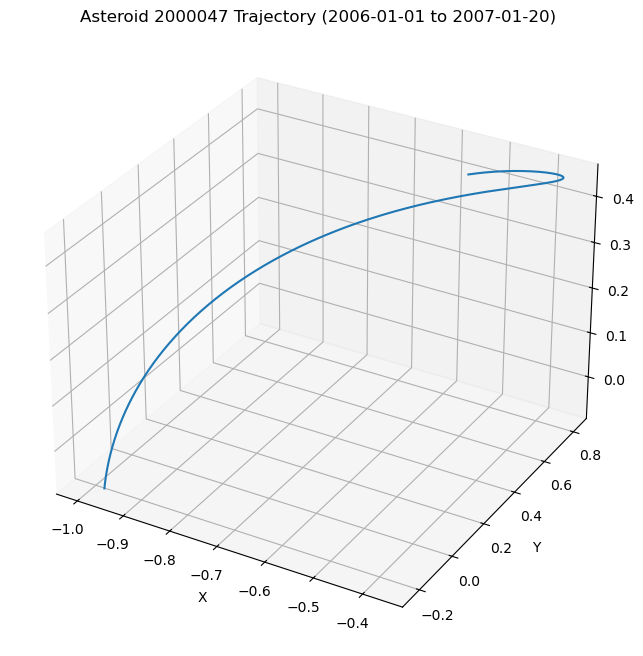

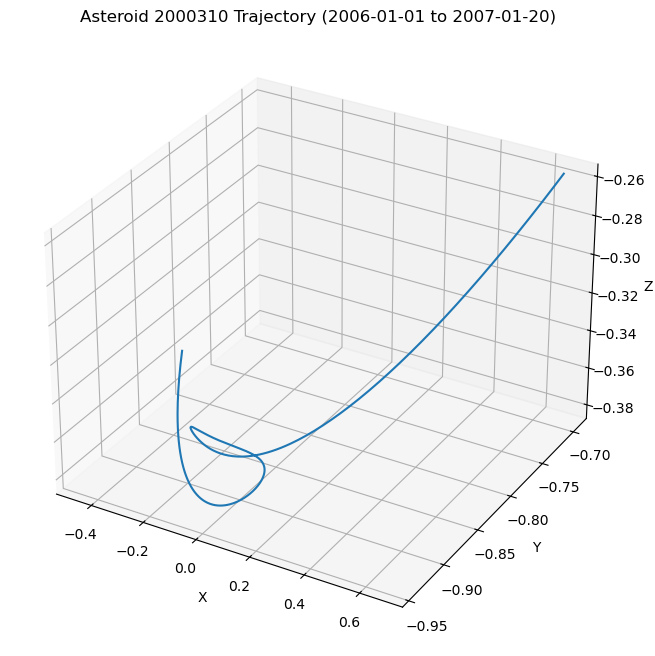

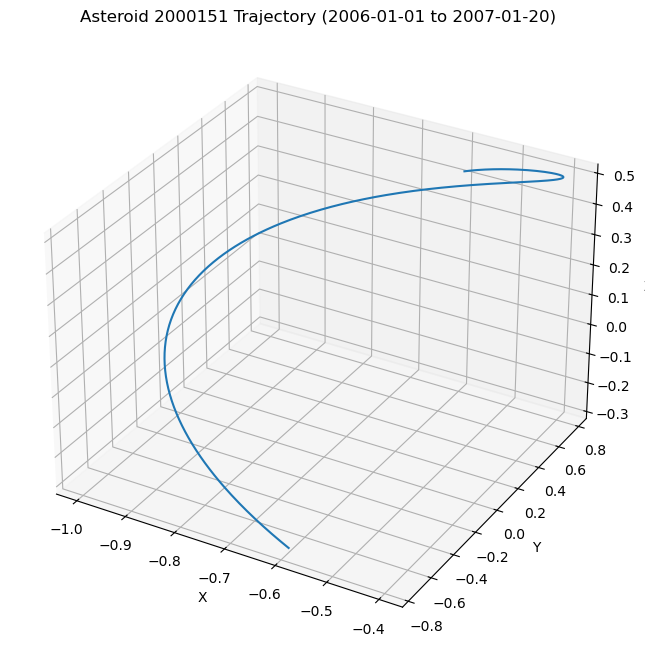

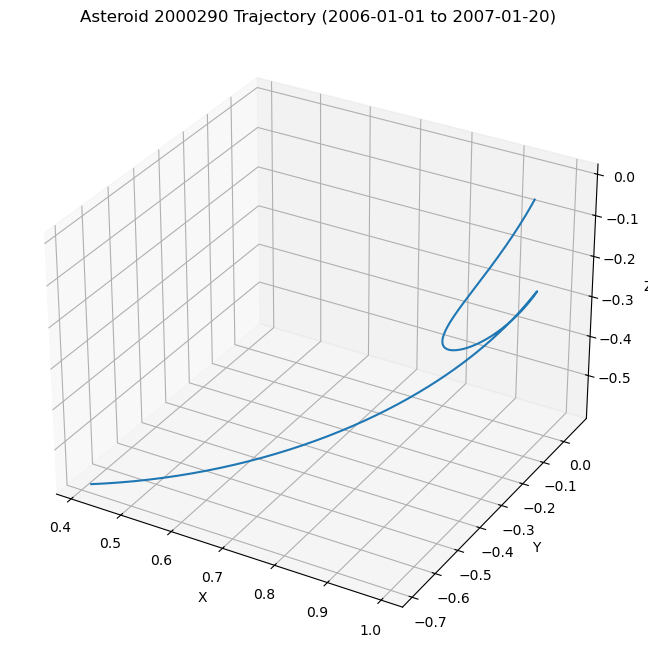

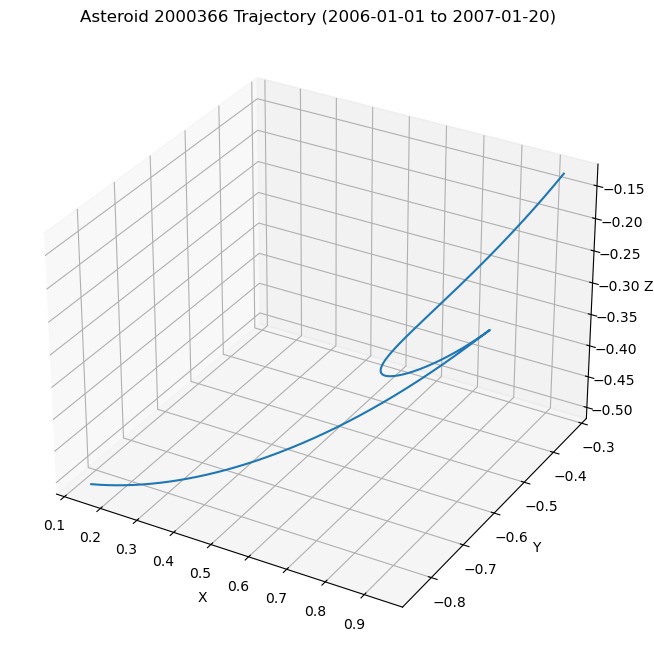

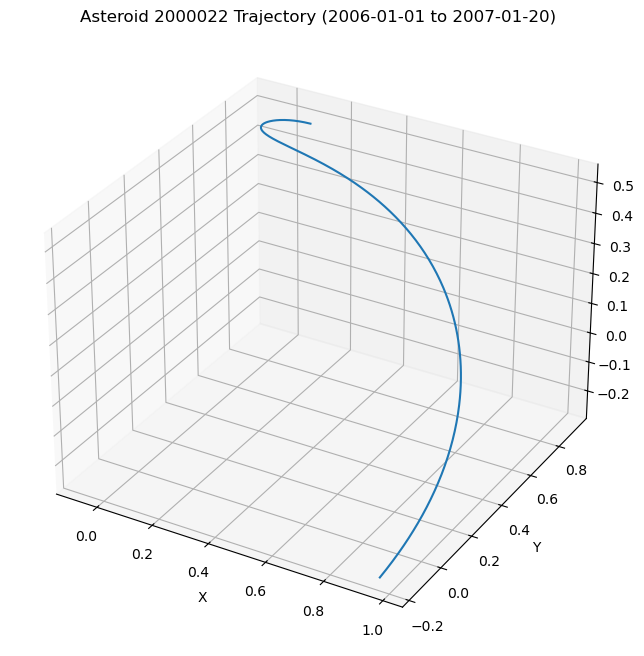

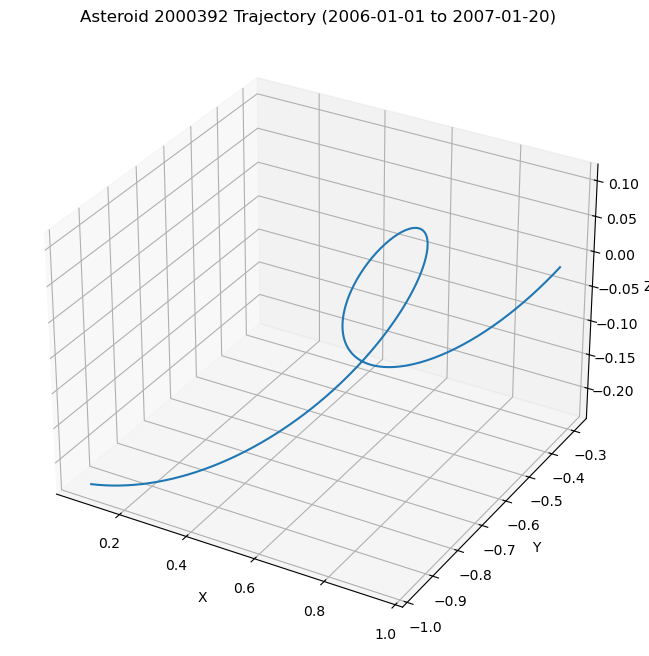

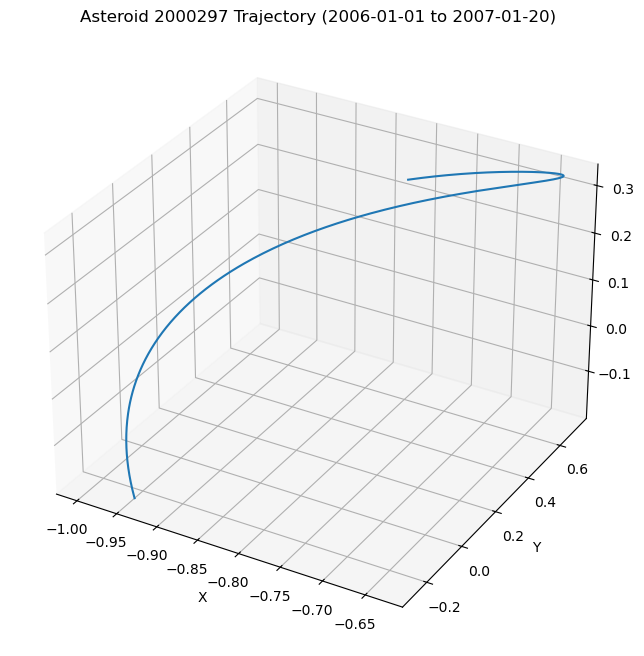

In [25]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
import astropy.units as u
import random

def fetch_horizons_data(des, start_time, stop_time, step_size='1d'):
    url = "https://ssd.jpl.nasa.gov/api/horizons.api"
    params = {
        'format': 'text',
        'COMMAND': f"'DES={des};'",
        'OBJ_DATA': 'YES',
        'MAKE_EPHEM': 'YES',
        'EPHEM_TYPE': 'OBSERVER',
        'CENTER': '500@399',
        'START_TIME': start_time,
        'STOP_TIME': stop_time,
        'STEP_SIZE': step_size,
        'QUANTITIES': '1'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.text
    return None

def parse_horizons_data(data):
    lines = data.split('\n')
    try:
        start_idx = lines.index('$$SOE') + 1
        end_idx = lines.index('$$EOE')
    except ValueError:
        return None, None, None
    
    dates, ra, dec = [], [], []
    for line in lines[start_idx:end_idx]:
        parts = line.split()
        dates.append(parts[0])
        ra.append(' '.join(parts[2:5]))
        dec.append(' '.join(parts[5:]))
    
    return dates, ra, dec

def plot_trajectory(dates, ra, dec, des):
    coords = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))
    x = coords.cartesian.x.value
    y = coords.cartesian.y.value
    z = coords.cartesian.z.value

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f"Asteroid {des} Trajectory (2006-01-01 to 2007-01-20)")
    
    plt.show()
#1000165
des_range = range(2000001, 2000500)
random_des_values = random.sample(des_range, 10)

for des in random_des_values:
    try:
        data = fetch_horizons_data(des, '2006-01-01', '2007-01-20')
        if data:
            dates, ra, dec = parse_horizons_data(data)
            if dates and ra and dec:
                plot_trajectory(dates, ra, dec, des)
            else:
                print(f"No valid data for DES={des}. Skipping.")
        else:
            print(f"Failed to fetch data for DES={des}. Skipping.")
    except Exception as e:
        print(f"Error processing DES={des}: {e}. Skipping.")